# Histogram
<h2>
    <ul>
        <li>Find histograms, using both OpenCV and Numpy Functions</li>
        <li>Plot histograms, uring OpenCV and Matplotlib functions</li>
        <li>You will see these functions : cv2.calcHist(), np.histogram() etc</li>
    </ul>
</h2>

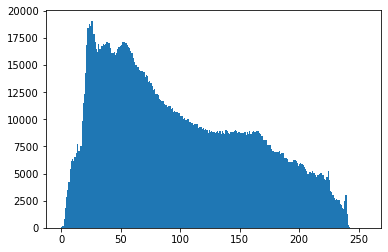

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('d150ccde31d79f3a53f5e633052d091b.jpg', 0)
plt.hist (img.ravel(), 256, [0, 256]); plt.show()

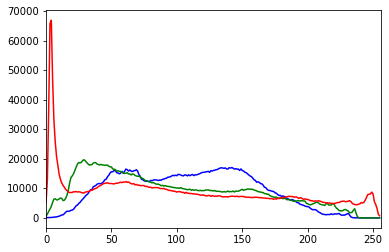

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('d150ccde31d79f3a53f5e633052d091b.jpg')
color = ('b', 'g', 'r')
for i, col in enumerate(color) :
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color = col)
    plt.xlim([0, 256])
plt.show()

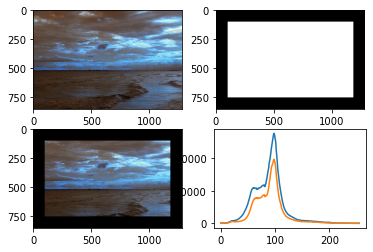

In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('beach-438500_1280.jpg')

# Create a mask
w, h = img.shape[:2]
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:w-100, 100:h-100] = 255
masked_img = cv2.bitwise_and(img, img, mask = mask)

# Calculate histogram with mask without mask
# Check third argument for mask
hist_full = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_mask = cv2.calcHist([img], [0], mask, [256], [0, 256])

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask, 'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)

plt.show()


# Histogram -2 Histogram Equalization
<h2>
    <ul>
        <li>We will learn the concepts of histogram equalization and use it to improve the contrast of our images</li>
    </ul>
</h2>

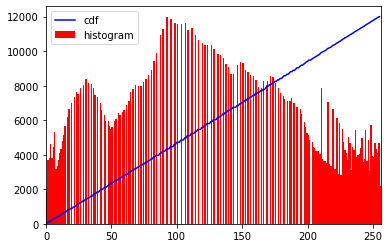

In [49]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread ('beach-438500_1280.jpg', 0)

img2 = cv2.equalizeHist(img)

hist, bins = np.histogram(img2.flatten(), 256, [0, 256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

plt.plot (cdf_normalized, color = 'b')
plt.hist (img2.flatten(), 256, [0, 256], color = 'r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc = 'upper left')
plt.show()


In [53]:
import numpy as np
import cv2

img = cv2.imread('img2.jpg', 0)

# Create a CLAHE object (Arguments are optional)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
cl1 = clahe.apply(img)

cv2.imshow('img2.jpg', img)
cv2.imshow('img2_2.jpg', cl1)
cv2.waitKey(0)
cv2.destroyAllWindows()